<a href="https://colab.research.google.com/github/hafsaAit/Computer-vision/blob/main/iris_acp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapitre 3 : Analyse en Composantes Principales (ACP)**

**`Réalisée par `:**

**Chaimaa ELQOUBAA**

**Hafsa AIT EL ATIK**

**Khadija ZOUHEIR**

In [ ]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
# Configuration de Seaborn pour un style clair
sns.set_style("white")

In [ ]:
# Permet d'afficher les graphiques dans un notebook
%matplotlib inline

In [ ]:
# Chargement des données
Iris_ds = pd.read_csv("/content/Iris.csv").dropna()
Iris_ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Étape 1 : Préparer les données
# Sélectionner les colonnes numériques pour l'ACP
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = Iris_ds[features]

# Normaliser les données (moyenne = 0, variance = 1)
X_scaled = scale(X)

In [ ]:
# Étape 2 : Effectuer l'ACP
# Créer une instance PCA et ajuster les données
pca = PCA(n_components=2)  # Réduire à 2 dimensions
principal_components = pca.fit_transform(X_scaled)

In [ ]:
# Créer un DataFrame pour les résultats
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Species'] = Iris_ds['Species']  # Ajouter la colonne des classes


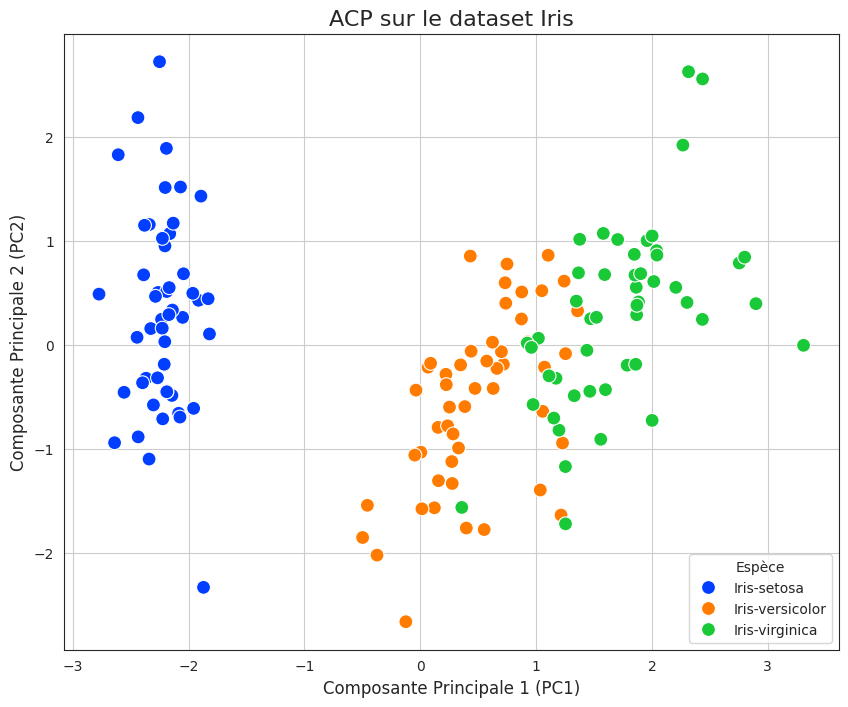

In [ ]:
# Étape 3 : Visualiser les résultats
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2', hue='Species', data=pca_df, palette='bright', s=100
)
plt.title("ACP sur le dataset Iris", fontsize=16)
plt.xlabel("Composante Principale 1 (PC1)", fontsize=12)
plt.ylabel("Composante Principale 2 (PC2)", fontsize=12)
plt.legend(loc='best', title='Espèce')
plt.grid()
plt.show()

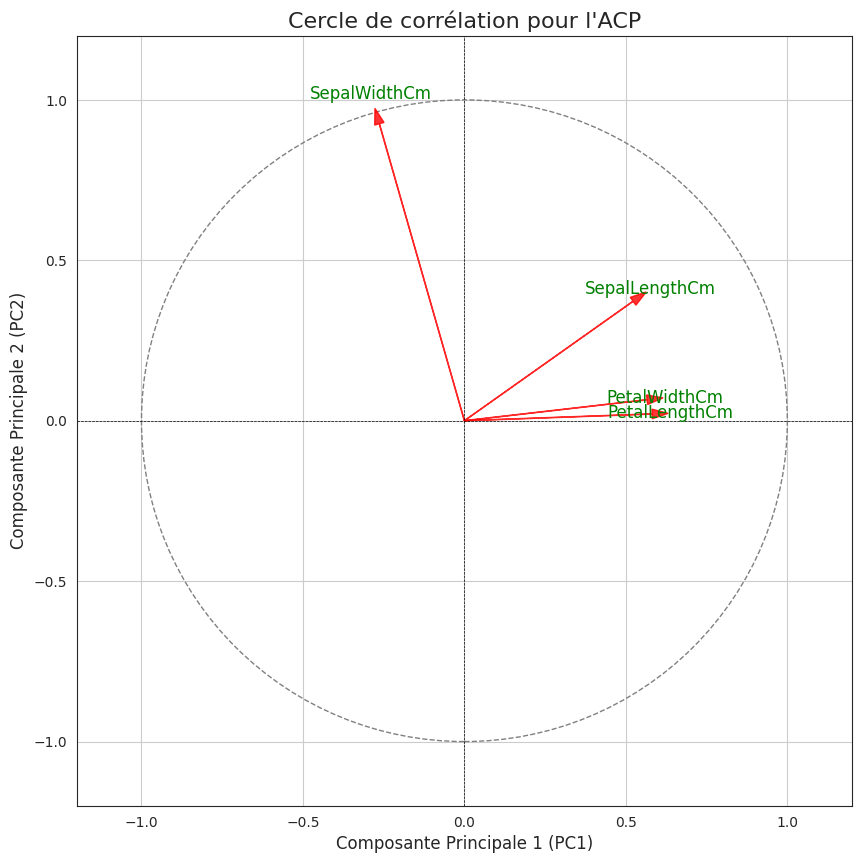

In [ ]:

# Étape 4 : Cercle de corrélation
fig, ax = plt.subplots(figsize=(10, 10))

# Tracer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', linewidth=1)
ax.add_artist(circle)

# Tracer les flèches pour chaque variable
for i, feature in enumerate(features):
    plt.arrow(
        0, 0,  # Origine
        pca.components_[0, i],  # Contribution à PC1
        pca.components_[1, i],  # Contribution à PC2
        color='r', alpha=0.8, head_width=0.03, head_length=0.05
    )
    plt.text(
        pca.components_[0, i] * 1.1,  # Position x du texte
        pca.components_[1, i] * 1.1,  # Position y du texte
        feature,
        color='g', ha='center', va='center', fontsize=12
    )

# Configuration
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.xlabel("Composante Principale 1 (PC1)", fontsize=12)
plt.ylabel("Composante Principale 2 (PC2)", fontsize=12)
plt.title("Cercle de corrélation pour l'ACP", fontsize=16)
plt.show()


**CONCLUSION :**

**Analyse en Composantes Principales (ACP) et Cercle de Corrélation**


 **Objectif :**

 Ce script effectue une Analyse en Composantes Principales (ACP) sur le jeu de données Iris.

 Il trace un cercle de corrélation permettant de visualiser les relations entre les variables d'origine

 et les deux premières composantes principales (PC1 et PC2).

 **Étapes détaillées :**

 1. **Préparation des Données :**

    - Chargement du dataset Iris et suppression des valeurs manquantes.

    - Sélection des colonnes numériques nécessaires à l'ACP (dimensions des fleurs).

    - Normalisation des données pour leur donner la même échelle (moyenne = 0, variance = 1).

 2. **Application de l'ACP :**
    - Utilisation de la bibliothèque sklearn pour calculer les composantes principales.

    - Extraction des coefficients des variables sur les deux premières composantes principales.

 3. **Construction du Cercle de Corrélation :**
    - Un cercle unitaire (rayon = 1) est tracé pour représenter la limite des contributions des variables.

    - Les flèches, basées sur les coefficients de PCA, montrent la direction et la force de chaque variable.

    - Chaque flèche est étiquetée avec le nom de la variable correspondante.

 4. **Vérification des Résultats :**
    - Les axes sont correctement limités entre -1.2 et 1.2 pour représenter un cercle parfait.
    - Un graphique bien annoté avec des étiquettes et un titre descriptif est généré.

 **Conclusion :**
 Ce code permet de visualiser clairement les relations entre les variables initiales et les composantes principales.
 Le cercle de corrélation fournit une compréhension intuitive de l'importance et de la corrélation des variables
 avec les nouveaux axes définis par l'ACP.



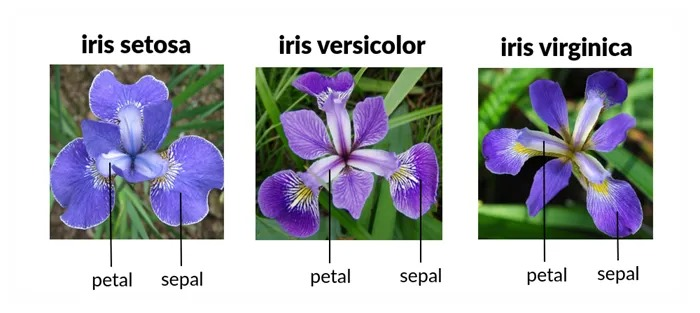